Epoch 0, Loss: 700.4297485351562
Epoch 100, Loss: 406.6248474121094
Epoch 200, Loss: 219.6114501953125
Epoch 300, Loss: 110.84367370605469
Epoch 400, Loss: 53.67145538330078
Epoch 500, Loss: 26.888832092285156
Epoch 600, Loss: 15.828335762023926
Epoch 700, Loss: 11.830500602722168
Epoch 800, Loss: 10.570899963378906
Epoch 900, Loss: 10.225494384765625


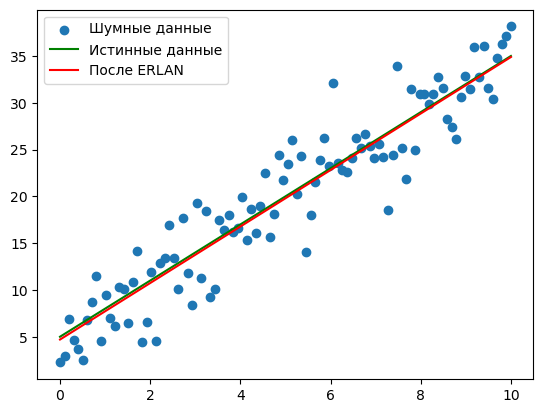

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Улучшенная ERLAN
class ERLAN(nn.Module):
    def __init__(self, input_size, num_layers=5):
        super(ERLAN, self).__init__()
        self.layers = nn.ModuleList()
        
        for _ in range(num_layers):
            self.layers.append(nn.Linear(input_size, input_size))  # Линейные слои
        
        self.output_layer = nn.Linear(input_size, 1)  # Выходной слой
        self.activation = nn.ReLU()

    def forward(self, x):
        residual = x  # Запоминаем входные данные
        
        for layer in self.layers:
            x = self.activation(layer(x))  # Линейный слой + ReLU
            x = x + residual  # Остаточное соединение
        
        return self.output_layer(x)  # Выходной слой

# Генерируем линейные данные
X = np.linspace(0, 10, 100)
y = 3 * X + 5  # Простая линейная зависимость

# Добавляем шум
noise = np.random.normal(0, 3, size=y.shape)  
y_noisy = y + noise  # Шумные данные

# Переводим в PyTorch тензоры
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)  
y_tensor = torch.tensor(y_noisy, dtype=torch.float32).unsqueeze(1)  

# Создаём и обучаем модель ERLAN
model = ERLAN(input_size=1, num_layers=5)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = loss_fn(output, y_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Проверяем, насколько модель убрала шум
with torch.no_grad():
    denoised = model(X_tensor).numpy()

plt.scatter(X, y_noisy, label="Шумные данные")
plt.plot(X, y, label="Истинные данные", color="green")
plt.plot(X, denoised, label="После ERLAN", color="red")
plt.legend()
plt.show()
